<a href="https://colab.research.google.com/github/PrzemyslawCh/PyTorch_Course/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Let's explorte a an example Pytroch endtoedn workflow.

In [ ]:
what_were_covering = {1: "data (prepate and load)",
                      2: "build model",
                      3: "fitting the moodel to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving an dloading model",
                      6: "putting it all together"}

In [ ]:
import torch
from torch import nn # nn contains all of pytorch's buildinf blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch bersion
torch.__version__

'1.13.1+cu116'

## 1. Data (Preparing and loading)

Data can be almost anything... in machine learning
* Excel spreadsheet
* Images of any kind
* Videos
* aUDIO like songs or podcasts
* DNA
* Text

Machine learning is a game of two podcasts
1. Get data into a numerical representation.
2. Build model to learn patterns from that numerical represenmtation

To showcase this , let's create some *known* data using linear regression formula y = a + bx

We'll use a linear regrtession formula to make a straight line with known *parameters*.


In [ ]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1) # adds extra dimesnions
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(x), len(y)

(50, 50)

### Splitting data into trainigng and test sets (one of the most importatnt concpets in machine learning in general)

Three dataset:

1. Course materials(training set)
2. Practice exam(validation set) Tune patterns
3. Fineal exam(test set) See if the model is ready for the wild

Generalization is the abillity for a machine learning model to perform well on data it hasnt seen before.

Let's create a training and test set with our data:

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
x_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

Let's visualize data above. The motto is visuallize, visualize, visualize

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test dataq in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s =4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14});

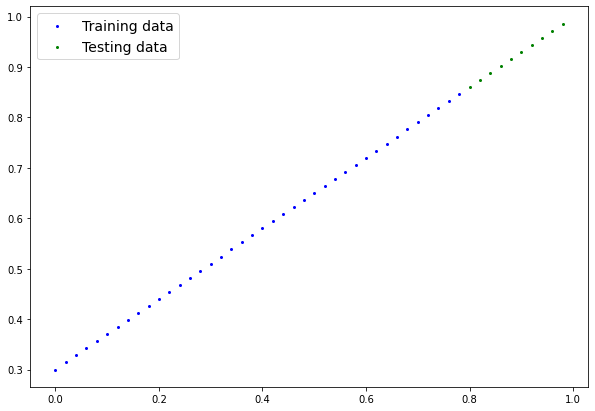

In [ ]:
plot_predictions();

## 2. Builidng model

Our first Pytorch model!

This is very exiting

Because we are going to be buliding classes throughout the course go to learnpythoin OOP

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and bias value we used to create the data)

How does it do so?

Through two main algotithms:
1. Gradient descent
2. Back
propagation

In [ ]:
from torch import nn

# Create linear regressin model class
class LinearRegressionModel(nn.Module): # Almost everything in python inherhits from nn.Module it is base class for all neural networks modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with radnom weight and try to adjust it to the ideal weight
                                            requires_grad=True, # can this parameter be updated via gradient descent
                                            dtype=torch.float)) # Pytorch loves the datatype torch.floast32

    self.bias = nn.Parameter(torch.randn(1, # start with random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # can this parameter be updated via gradient descnet
                                         dtype=torch.float)) # Pytorch loves the datatype torch.float32

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula



### Pytorch model builidng esentials

* torch.nn  contains all of the buildings for computational graophs (a neural network could be consider a computentional grapoh)
* torch.nn.Parameter - what paramaeters should our model try and learn often a patothc from toprch.nn will set up dfor us
* torch.nn.Module - the base class for oall neural network modules , if you sublasss is you houl everrite forward
* torch.optim - this is were the optimizers in pytorvch live, they will help with gradient descent
* All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

### Checking the contents of our PyTorch model

Noew we ve created a model let's see what's inside

so we can check our model parameters or hats is inside our model usinf '.parameters()'


In [ ]:
# Let's create random seed

torch.manual_seed(42)

# Create an isntance of the model (this is a subclass of nn.Module
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using 'torch.inference_mode()'

To check out model's predictions power, let's see how well it predicts 'y_test' based on 'x_test'

When we pass data through our model it is going to run it through the forward () method



In [ ]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(x_test)

# You can also do something similat with torch.no_grad() but torch.inference_mode() is better
# with torch.no_grad():
#   y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

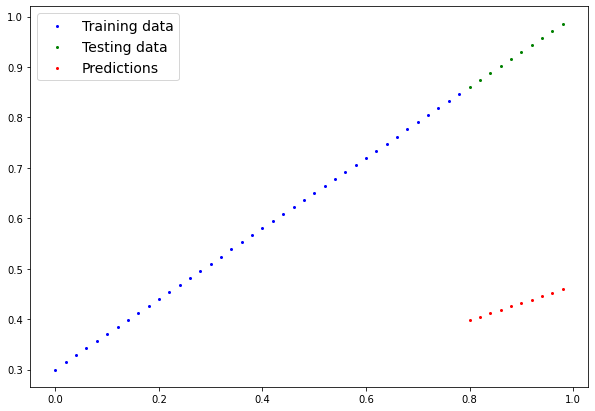

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea og trainign is fora modle to move from some uknown paramters (these may be random) to some known parameter

Ort in other words from poor representations of data to a better representation of the data

One way to measeure hwo poor or how worng your models predictions are is to use pytorch loss functions

Note loss funtioins may also be called cost funtions or criterion in defferenr areas For our case wea are goiunf to refer to it as a loss function

Things we need to train:

Loss function is a functuion to measusre how wrong your model predicitons are to the ideal outputs (lower is better)

optimizer takes into account the loss of a model and adjust the model''s parameters (weoghts and bias in our case) to improve the loss functuon

ANd specifically for pytorch we need a trainnig loop
and a tetstingo loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our models parameters (a paramter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss fucntion
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr learning rate = possibility he most importantn hyperparameter you can set


### Building a training loop (and a testing loop) in PyTorch

What we need?

0. Loop through the data
1. Forward pass  (this involves data moving thorough our models forward() to make predictions on data  also called forwarrd propagation
2. Calculate the loss (compare forward pass predictions to dround truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards throughthe network to calculate the gradient of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step  - use the optimizer to adjust our models parameters to try and improve the loss (**gradient descent**)  


In [ ]:
# An epoch is one loop through the data ... (this is a hyperparameter beacause we have set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []
### Training

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to raining mode
  model_0.train() # train mode in PyTorch set all parameters that requaire gradients to requaire gradients

  # 1. Forward pass
  y_pred = model_0(x_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with the resoect tot the poarameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate the lopp so... we have to zetro them above step 3

  ### Testing
  model_0.eval() # turns off differenr settings in the modelnot needed for evaluation.testing (dropout/bach norm laytets)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behnd the scene check twitter
    # 1. Do the forward pass
    test_pred = model_0(x_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print oput what is happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
  # Print out model statedict()
  print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tenso

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:

import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

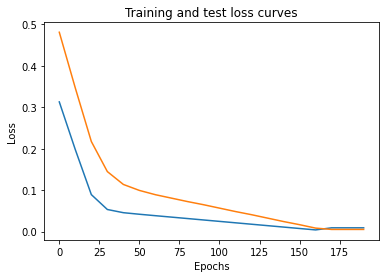

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

with torch.inference_mode():

  y_pred_new = model_0(x_test)

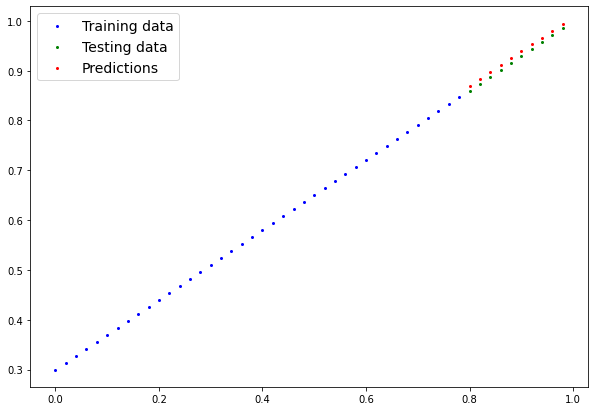

In [ ]:
plot_predictions(predictions=y_pred_new)

## Saving a model in PyTorch

There are 3 main methods you should kno about for saving and loading models in Pytorch.

1. 'torch.save' - allows you save Pytorch object in Pythons pickle format
2. 'torch.load()' - allows you load a saved Pytoch  object
3. 'torch.nn.Module.load_state_dict()' - thius allows to load a mondels saved state dictionary

In [ ]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_disct
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: Models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l Models


total 4
-rw-r--r-- 1 root root 1207 Mar  3 13:53 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we have saved our models state_dict() rather then intire modele we will cerate a new instace of our model class and load the save satet_dict() into tha

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 this will update the  new isntanve with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predcitions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original mnodel preds
y_preds == loaded_model__preds



NameError: ignored

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)

In [ ]:
y_preds == loaded_model__preds

NameError: ignored

## 6. Putting it all together

Let's go bak through the stepds above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check Pytorch version
torch.__version__

'1.13.1+cu116'

Create device-agnostic code.

This means if we have got access to a GPU, our code will use it (for potentially daster computing).epoch_count

If no GPU i s available the code will deafult using GPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Fri Mar  3 13:54:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 6.1 Data

In [ ]:
# Create some data usiung the linear regeression formula of y = weoght * X + bias
weight = 0.2
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
x = torch.arange(start, end, step).unsqueeze(dim=1) # withoput unsqueeze, errores will pop
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160],
         [0.1200],
         [0.1240],
         [0.1280],
         [0.1320],
         [0.1360]]))

In [ ]:
# Split data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

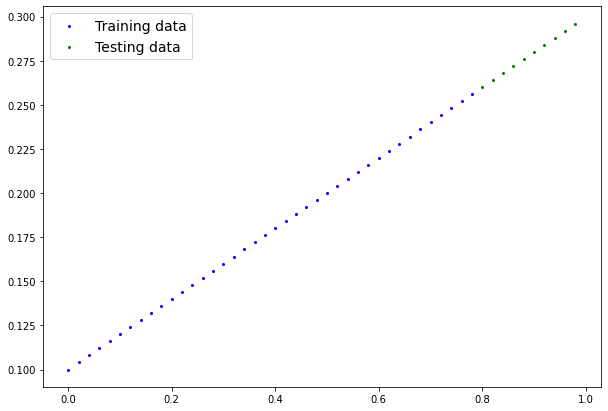

In [ ]:
# Plot the data
# Note: if you do not have the plot_predicitons() functon loaded, this will error
plot_predictions(x_train, y_train, x_test, y_test)

## 6.2 Building a Pytoch Linear model


In [ ]:
# Create a linear model by subcalssing nn.Module

class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters also called linear ytasnform,
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
x_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160]]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* loss functon
* optimizer
* training loop
* testing loop

In [ ]:
# Let's set up Loss funcyion
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 300

# Put data on the target device (device agnostic code for data)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(x_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what is happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.9501779675483704 | Test loss: 1.2189762592315674
Epoch: 10 | Loss: 0.8349680304527283 | Test loss: 1.0842664241790771
Epoch: 20 | Loss: 0.7197582125663757 | Test loss: 0.9495565295219421
Epoch: 30 | Loss: 0.6045483350753784 | Test loss: 0.8148466944694519
Epoch: 40 | Loss: 0.48933839797973633 | Test loss: 0.6801369190216064
Epoch: 50 | Loss: 0.3741285800933838 | Test loss: 0.5454270839691162
Epoch: 60 | Loss: 0.2589186728000641 | Test loss: 0.4107172191143036
Epoch: 70 | Loss: 0.14370866119861603 | Test loss: 0.2760072350502014
Epoch: 80 | Loss: 0.061817992478609085 | Test loss: 0.16681917011737823
Epoch: 90 | Loss: 0.04544008895754814 | Test loss: 0.11851485818624496
Epoch: 100 | Loss: 0.04073662683367729 | Test loss: 0.09805625677108765
Epoch: 110 | Loss: 0.03724662587046623 | Test loss: 0.08703624457120895
Epoch: 120 | Loss: 0.03379501774907112 | Test loss: 0.07807689160108566
Epoch: 130 | Loss: 0.030359594151377678 | Test loss: 0.07049133628606796
Epoch: 140 | Lo

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2052]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1005], device='cuda:0'))])

In [ ]:
weight, bias

(0.2, 0.1)

In [ ]:
# Turn model into evaulation mode
model_1.eval()

# Make predicitons on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.2647],
        [0.2688],
        [0.2729],
        [0.2770],
        [0.2811],
        [0.2852],
        [0.2893],
        [0.2934],
        [0.2975],
        [0.3016]], device='cuda:0')

TypeError: ignored

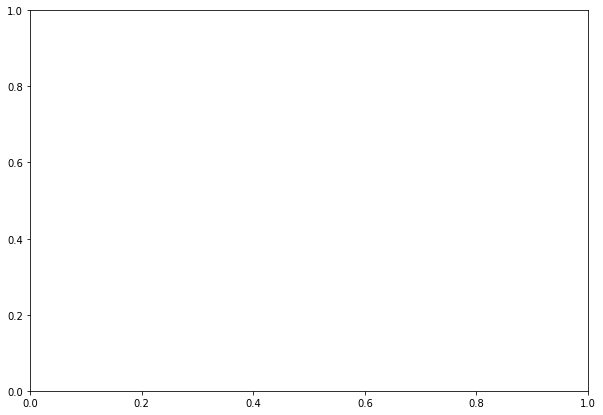

In [ ]:
# Check out our model predcitions visually
plot_predictions(predictions=y_preds.cpu())

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test dataq in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s =4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14});

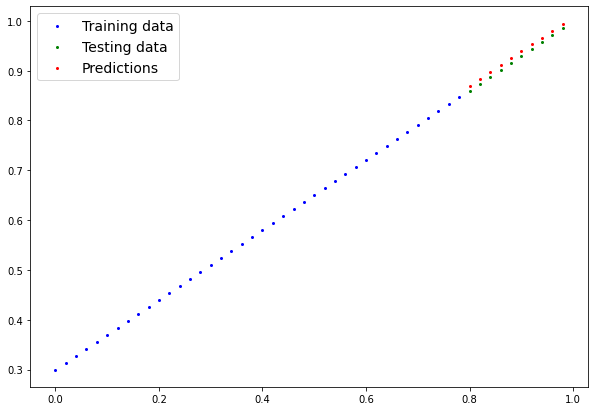

In [ ]:
plot_predictions(predictions=y_pred_new)

### 6.5 Saving and loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save pat
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models/01_pytorch_workflow_model_1.pth


In [ ]:
# LOAD a pytoch

#Create a new instance of linear regeression model v2
loaded_model_1 = LinearRegressionModelv2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2052]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1005], device='cuda:0'))])

In [ ]:
# Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Create some data it should be at least 100 datapoints in total
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 1
step = 0.004

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze errors will happen later on
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0040],
         [0.0080],
         [0.0120],
         [0.0160],
         [0.0200],
         [0.0240],
         [0.0280],
         [0.0320],
         [0.0360]]), tensor([[0.9000],
         [0.9012],
         [0.9024],
         [0.9036],
         [0.9048],
         [0.9060],
         [0.9072],
         [0.9084],
         [0.9096],
         [0.9108]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(200, 200, 50, 50)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=0.5, label="Training data")

  # Plot test dataq in green
  plt.scatter(test_data, test_labels, c="g", s=0.5, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s =0.5, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14});

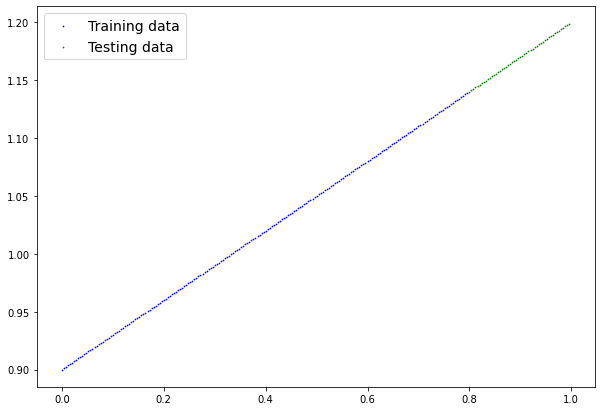

In [ ]:
# Let's visualize data
plot_predictions(X_train, y_train, X_test,y_test)

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelv3(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed when creating the model (this is not always need but is used for demonstrative purposes)
torch.manual_seed(42)
model_2 = LinearRegressionModelv3()
model_2, model_2.state_dict()



(LinearRegressionModelv3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check model fevice
next(model_2.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_2.to(device)# the device variable was set above to be "cuda" if available or "cpu" if not
next(model_2.parameters()).device

NameError: ignored

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")